In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as s
import initScripts as script
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [2]:
def testModel(df=None,X=['T-outside','H-outside','T-inside','H-inside','On','Cost','SetT'],y='KWH',model=None, params=None,times=10,X_train=None,y_train=None,X_val=None,y_val=None,X_test=None,y_test=None):
   
    clf = RandomizedSearchCV(model, params, random_state=0,n_jobs=-1,n_iter=10)
    modelClf = clf.fit(X_train,y_train)
    
    print("Best parameters for model")
    print(modelClf.best_params_)
    print("Best score for model")
    print(modelClf.best_score_)
    
    test = modelClf.predict(X_test)
    plt.scatter(X_test['T-outside'],test, c=X_test['T-inside'],cmap='plasma')
    plt.plot([15,15],[0,8])
    plt.colorbar()
    plt.title('Predicted')
    plt.show()
    
    plt.scatter(X_test['T-outside'],y_test, c=X_test['T-inside'],cmap='plasma')
    plt.plot([15,15],[0,8])
    plt.colorbar()
    plt.title('Default')
    plt.show()

### Elesatic net 56
### SVR 57

In [3]:
df = script.loadDataset('H')
df['On'] = df['T-outside'].apply(lambda x : 1 if x <= 15 else 0)
df = df[df['KWH'] != 0]
df['SetT'] = 22
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6150 entries, 2019-04-09 00:00:00 to 2019-12-31 23:00:00
Data columns (total 7 columns):
T-outside    6150 non-null float64
H-outside    6150 non-null float64
KWH          6150 non-null float64
T-inside     6150 non-null float64
H-inside     6150 non-null float64
On           6150 non-null int64
SetT         6150 non-null int64
dtypes: float64(5), int64(2)
memory usage: 384.4 KB


In [4]:
df.head()

,T-outside,H-outside,KWH,T-inside,H-inside,On,SetT
Time,,,,,,,
2019-04-09 00:00:00,19.611111,45.0,6.670,28.698603,20.171211,0,22
2019-04-09 01:00:00,19.625000,45.0,6.626,28.700584,20.178471,0,22
2019-04-09 02:00:00,19.611111,45.0,4.788,28.698603,20.171211,0,22
2019-04-09 03:00:00,19.587500,45.0,4.378,28.695236,20.158869,0,22
2019-04-09 04:00:00,19.600000,45.0,4.210,28.697019,20.165403,0,22


In [7]:
X=['T-outside','H-outside','T-inside','H-inside','On','SetT']
y='KWH'
X = df[X]
y = df[y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

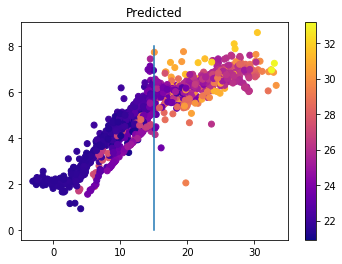

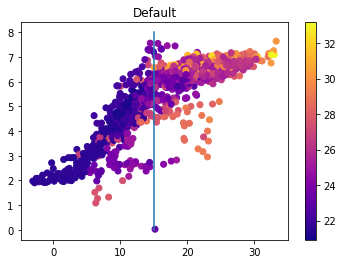

0.8141232613991646

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=4)
polyData = poly.fit_transform(X_train)
reg = LinearRegression()
reg.fit(polyData,y_train)
test = reg.predict(poly.transform(X_test))
plt.scatter(X_test['T-outside'],test, c=X_test['T-inside'],cmap='plasma')
plt.plot([15,15],[0,8])
plt.colorbar()
plt.title('Predicted')
plt.show()
plt.scatter(X_test['T-outside'],y_test, c=X_test['T-inside'],cmap='plasma')
plt.plot([15,15],[0,8])
plt.colorbar()
plt.title('Default')
plt.show()
testX = poly.transform(X_test)
reg.score(testX,y_test)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'kernel': 'rbf', 'gamma': 0.0001, 'epsilon': 0.2, 'C': 10}
Best score for model
0.8147390962082082


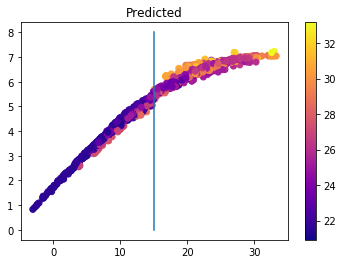

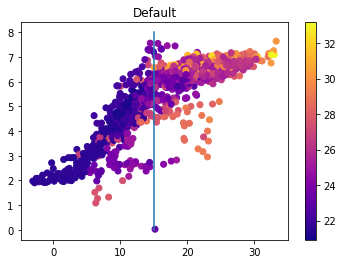

In [9]:
SVRestimator = SVR()
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
testModel(df=df,model=SVRestimator,params=parameters,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)


C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1023.437684356072, tolerance: 0.9964307840676575
  positive)


Best parameters for model
{'selection': 'random', 'max_iter': 10, 'l1_ratio': 0.0, 'alpha': 0.01}
Best score for model
0.7945727346229616


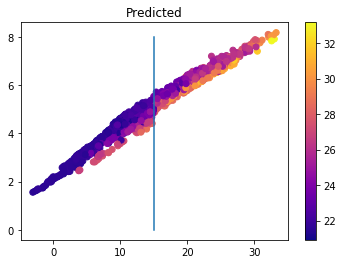

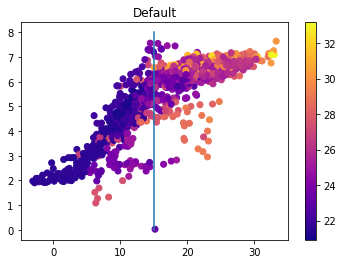

In [10]:
ElasticNet = ElasticNet()
parameters = {"max_iter": [1, 5, 10],"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio": np.arange(0.0, 1.0, 0.1),'selection': ('random','cyclic')}
testModel(df=df,model=ElasticNet,params=parameters,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)


C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'alpha': 1}
Best score for model
0.7976529105590145


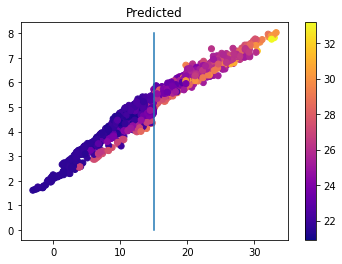

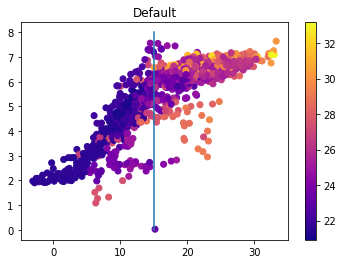

In [11]:
from sklearn.linear_model import Ridge
RidgeReg = Ridge()
parameters = {'alpha':[0.1,0.5,1,2,5,10,50,200, 230, 250,265, 270, 275, 290, 300, 500]}

testModel(df=df,model=RidgeReg,params=parameters,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'penalty': 'elasticnet', 'max_iter': 459, 'loss': 'huber'}
Best score for model
0.7453469739700443


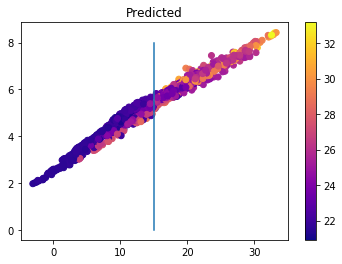

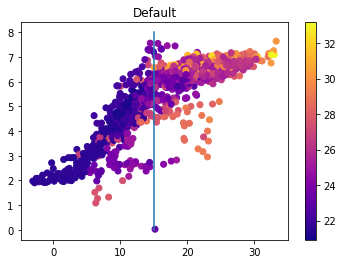

In [12]:
from sklearn import linear_model
SGD = linear_model.SGDRegressor()
parameters = {'loss':('squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'), 'penalty':('l2', 'l1', 'elasticnet'), 'max_iter':range(1,1000)}

testModel(df=df,model=SGD,params=parameters,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'alpha': 0.5}
Best score for model
0.7802961305906474


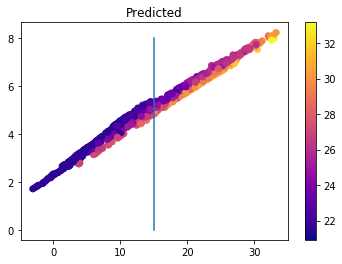

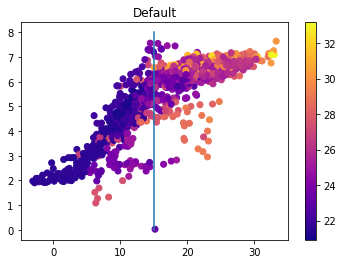

In [13]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
LassoModel = Lasso()
parameters = {'alpha':[0.1,0.5,1,2,5,10,50,200, 230, 250,265, 270, 275, 290, 300, 500]}
testModel(df=df,model=LassoModel,params=parameters,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}
Best score for model
0.8146300839163592


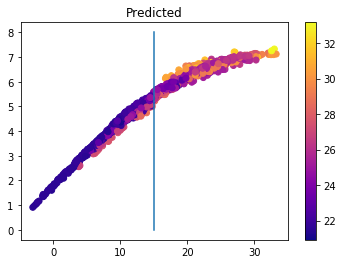

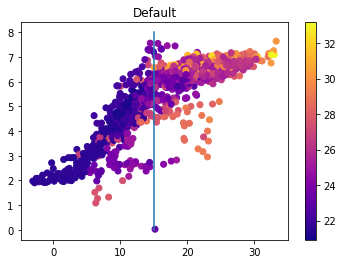

In [14]:
from sklearn.svm import NuSVR
NuSVRestimator = NuSVR()
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4]}
testModel(df=df,model=NuSVRestimator,params=parameters,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)


C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'alpha': 1}
Best score for model
0.7976533153072755


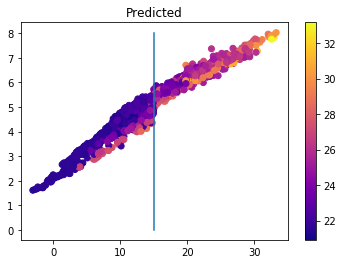

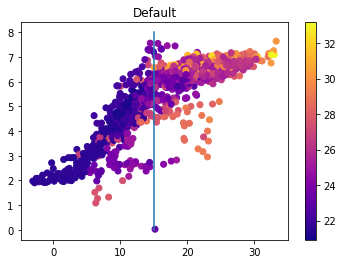

In [15]:
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge()
parameters = {'alpha':[0.1,0.5,1,2,5,10,50,200, 230, 250,265, 270, 275, 290, 300, 500]}
testModel(df=df,model=kr,params=parameters,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'weights': 'distance', 'n_neighbors': 9, 'n_jobs': -1, 'leaf_size': 3, 'algorithm': 'kd_tree'}
Best score for model
0.9017324809425155


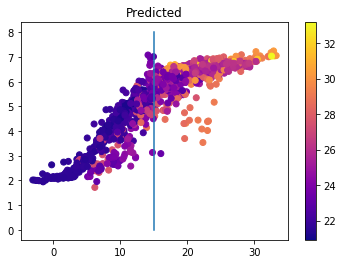

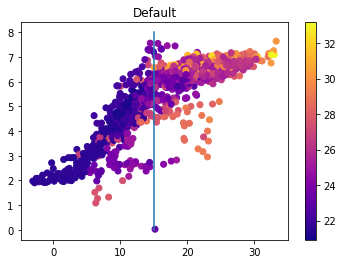

In [16]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
parameters = {'n_neighbors':[8,9,10,11,12,13,15,16,20,5],
          'leaf_size':[1,2,3,5,30,10,15,20],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
testModel(df=df,model=KNN,params=parameters,times=40,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'alpha': 1}
Best score for model
0.7976533153055941


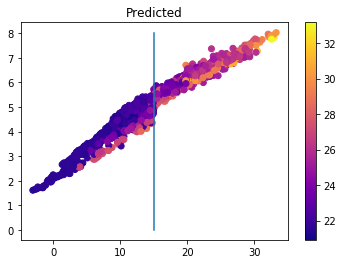

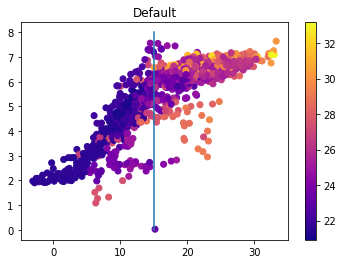

In [17]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0)
parameters = {'alpha':[0.1,0.5,1,2,5,10,50,200, 230, 250,265, 270, 275, 290, 300, 500]}
testModel(df=df,model=gpr,params=parameters,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'random_state': 0, 'n_estimators': 7, 'base_estimator': None}
Best score for model
0.9014555916126488


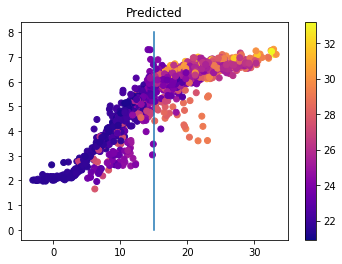

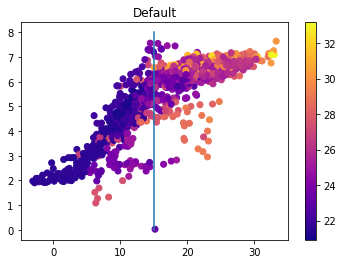

In [18]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor()
parameters = {'base_estimator':(SVR(),None),'n_estimators':range(1,10),'random_state':[0,1]}
testModel(df=df,model=bagging,params=parameters,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for model
{'random_state': 1, 'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best score for model
0.9123331091234305


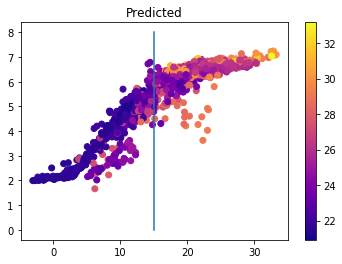

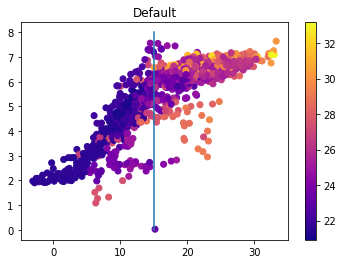

In [19]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()
parameters = {'bootstrap': [True, False],'max_depth':[9,10,11,12,13,15,20,None], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10],'max_features': ['auto', 'sqrt'],'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],'random_state':[1,0]}
testModel(df=df,model=randomForest,params=parameters,times=40,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test,y_test=y_test)